In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msno
import numpy  as np
import seaborn as sns
%matplotlib inline

path = './data/'
pd.options.display.max_rows = 150
pd.options.display.max_columns = 350
plt.rc('font',family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

In [70]:
sigungu = pd.read_csv(path+'sigungu_imp_10.csv', encoding='cp949')
sigungu_3 = pd.read_csv(path+'시군구별지역안전지표_2015.csv', encoding='cp949')

In [71]:
y_bin = sigungu.iloc[:,-7:] #등급(binary) - 15년, 14년도 
y_deci = sigungu_3.iloc[:,-7:] #등급(1-5) - 15년
X = sigungu.iloc[:,4:-7] #독립변수X - 15년 
name = sigungu.iloc[:,:4] #이름 - 15년
y_bin.columns = ['fire','transport','disaster','crime','accident','suicide','infection']

In [72]:
#전국 산업단지(2015)
전국산업단지 = pd.read_csv(path+'전국산업단지현황_정지연.csv', encoding='cp949')
신규산업단지 = pd.read_csv(path+'신규지정산업단지_정지연.csv', encoding='cp949')

In [77]:
전국산업단지 = 전국산업단지.loc[(전국산업단지.조성상태=='완료')&(전국산업단지['고용현황(계)']!='0')]
전국산업단지.분양률 = 전국산업단지.분양률.astype(np.int64)
전국산업단지.loc[전국산업단지.분양률<70]

,유형,시도,시군,단지명,조성상태,지정면적,관리면적,전체면적,분양대상,분양,미분양,분양률,입주업체,가동업체,고용현황(남),고용현황(여),고용현황(계),누계생산(백만원),누계수출(천달러)
30,국가,강원,동해시,동해(자유무역),완료,248,239,192,192,45,147,23,14,11,113,16,129,6377,2367
35,국가,충남,당진시,석문,완료,12012,9475,4712,4712,1023,3689,21,66,19,255,30,285,43640,6223
60,국가,경북,구미시,구미4(구미외국인),완료,1591,578,578,578,339,239,58,22,20,3220,789,4009,583515,151180
136,일반,대구,서구,서대구(재생사업지구),완료,2662,2662,1322,0,0,0,0,2168,2168,9602,4555,14157,157302,15013
139,일반,광주,광산구,평동(월전중소협력외국인),완료,99,99,99,99,60,39,60,3,3,102,20,122,6690,4510
187,일반,경기,남양주시,광릉테크노밸리,완료,210,210,107,107,50,57,46,15,5,423,135,558,29500,0
226,일반,경기,오산시,가장2,완료,595,595,396,396,89,307,22,30,14,885,588,1473,30456,13071
260,일반,경기,화성시,장안첨단(2),완료,614,614,369,369,104,265,28,5,4,372,125,497,33265,0
328,일반,강원,원주시,문막반계,완료,423,420,282,282,104,178,36,12,9,280,75,355,34004,7321
329,일반,강원,원주시,문막반계(문막중소협력외국인),완료,99,99,99,99,35,64,35,3,3,72,10,82,8264,6813


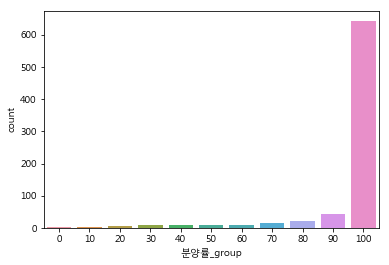

In [87]:
import seaborn as sns
전국산업단지['분양률_group']=전국산업단지.분양률.apply(lambda x : x//10*10)
sns.countplot(x='분양률_group', data=전국산업단지)

TypeError: cannot perform reduce with flexible type

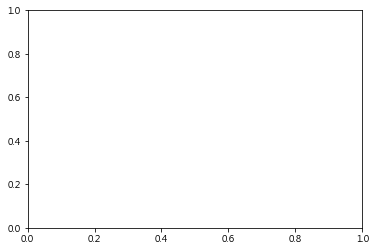

In [93]:
sns.distplot('분양률')

In [84]:
전국산업단지.분양률_group.cumsum()

0         100
1         200
2         300
4         400
5         500
        ...  
1201    72480
1203    72580
1207    72680
1208    72780
1209    72880
Name: 분양률_group, Length: 774, dtype: int64